In [19]:
pip install seaborn wordcloud matplotlib

In [20]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [21]:

# 🧠 Load the dataset
df = pd.read_csv('C:\\Users\\Parth\\OneDrive\\Desktop\\fake_job_postings.csv')

# 👀 Basic info
print("Shape:", df.shape)
df.head()

Shape: (17880, 18)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


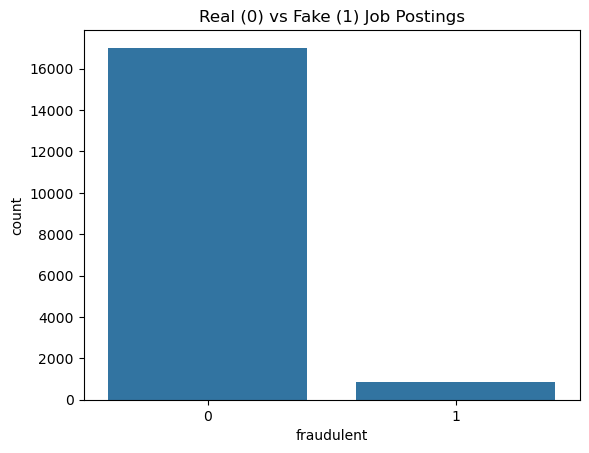

In [22]:
# ❓ Missing values
df.isnull().sum().sort_values(ascending=False)

# 📊 Class distribution
sns.countplot(x='fraudulent', data=df)
plt.title('Real (0) vs Fake (1) Job Postings')
plt.show()


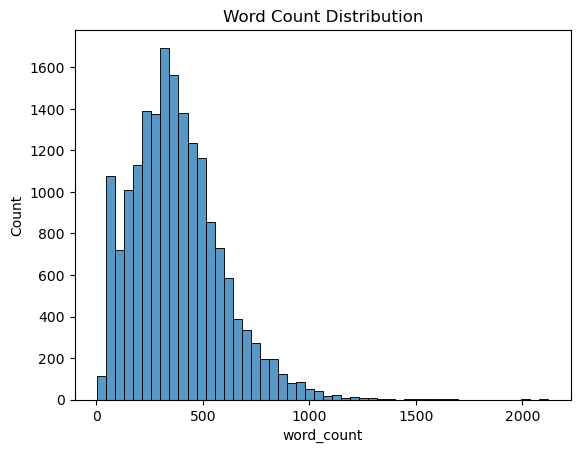

In [23]:
# 🧹 Combine text fields
text_cols = ['title', 'location', 'department', 'salary_range', 'company_profile',
             'description', 'requirements', 'benefits']
df['full_text'] = df[text_cols].fillna('').agg(' '.join, axis=1)

# 🔢 Word count
df['word_count'] = df['full_text'].apply(lambda x: len(x.split()))
sns.histplot(df['word_count'], bins=50)
plt.title('Word Count Distribution')
plt.show()


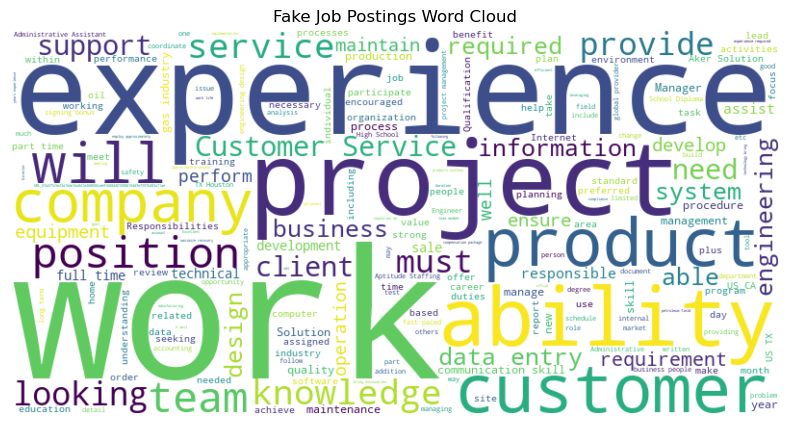

In [24]:
# ☁ Word Cloud: Fake
fake_text = ' '.join(df[df['fraudulent'] == 1]['full_text'])
wc_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.figure(figsize=(10, 5))
plt.imshow(wc_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Fake Job Postings Word Cloud')
plt.show()

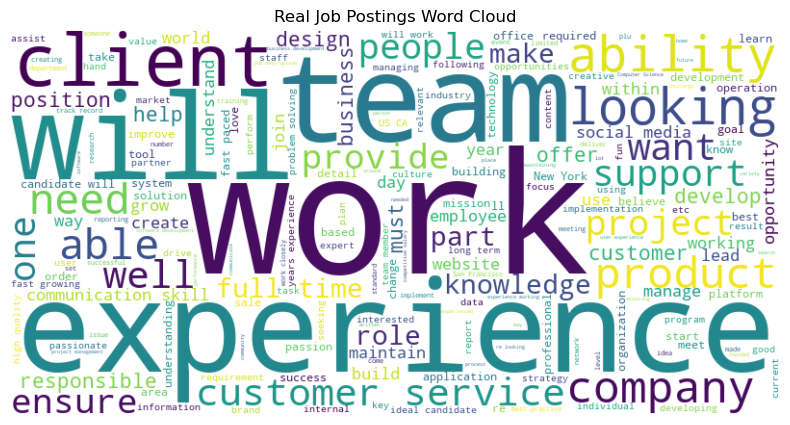

In [25]:
# ☁ Word Cloud: Real
real_text = ' '.join(df[df['fraudulent'] == 0]['full_text'])
wc_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.figure(figsize=(10, 5))
plt.imshow(wc_real, interpolation='bilinear')
plt.axis('off')
plt.title('Real Job Postings Word Cloud')
plt.show()
